## Primer: iskanje neslanih šal

Tokrat si bomo ogledali zbirko podatkov Jester, ki je dokaj podobna tisti pri domači nalogi. Gre za zbirko 100 šal (vicev), ki jih je ocenilo 23500 uporabnikov z oceno $-10$ (porazno) do $10$ (odlično). Ocena je torej zvezna spremenljivka. 

Naš glavni cilj bo modeliranje statistik v podatkovni zbirki z uporabo znanih porazdelitev. To nam bo omogočalo, da  **med šalami poiščemo osamelce** in ocenimo njihovo statistično značilnost - verjetnost, da gre za osamelca ali ne. 


Začnimo z naključno šalo iz podatkovne zbirke:

``A mechanical, electrical and a software engineer from Microsoft were driving through the desert when the car broke down. The mechanical engineer said "It seems to be a problem with the fuel injection system, why don't we pop the hood and I'll take a look at it." To which the electrical engineer replied, "No I think it's just a loose ground wire, I'll get out and take a look." Then, the Microsoft engineer jumps in. "No, no, no. If we just close up all the windows, get out, wait a few minutes, get back in, and then reopen the windows everything will work fine."``

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')
import numpy as np

Podatki so matrika velikosti $23500 \times 100$ z zveznimi vrednosti. Vrednost $99$ predstavlja neznano vrednost, takih vrednosti zato ne smemo upoštevati.

In [2]:
X = np.genfromtxt('podatki/jester-data.csv', delimiter=',',)[:, 1:]
X[np.where(X == 99)] = float("nan")  # neznanih vrednosti ne smemo upoštevati

print("velikost:", X.shape)
print("skupno število ocen:", X.size - np.sum(np.isnan(X)))

velikost: (23500, 100)
skupno število ocen: 1708993


Poglejmo, kakšna je porazdelitev vseh veljavnih ocen.

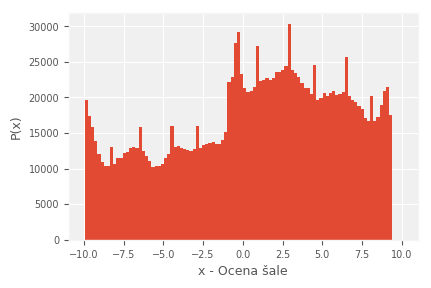

In [3]:
data = X[np.isnan(X) == False]
plt.hist(data, bins=100)
plt.xlabel("x - Ocena šale")
plt.ylabel("P(x)");

Vidimo, da je večina ocen nevtralnih (okoli 0), veliko pozitivnih (med 3 in 10) ter nekaj zelo slabih (-10). Najmanj je srednje slabih (-9 do -1). Navkljub temu ima ta porazdelitev naslednje težave:
 * Vzorec ni nepristranski. Vsak uporabnik je ocenil različno število šal.
 * Porazdelitev ne spominja na nobeno od znanih.

Kako bi primerjali šale glede na njihove ocene?

Poglejmo najprej, koliko veljavnih ocen je prejela vsaka od šala:

In [4]:
(np.isnan(X) == False).sum(axis=0)  # vsota po posameznih šalah

array([15507, 16954, 15755, 14901, 23498, 19154, 23497, 23497, 14988,
       18943, 20480, 21019, 23499, 21205, 23499, 23497, 23499, 23497,
       23497, 23498, 23471, 20177, 18706, 15188, 19502, 22383, 23438,
       22551, 23467, 17002, 23204, 23481, 15774, 20372, 23486, 23499,
       15941, 21481, 21870, 21039, 17599, 23202, 16656, 15472, 19974,
       22208, 20875, 23333, 23492, 23499, 17795, 18752, 23498, 23240,
       18589, 23328, 15212, 14913, 17212, 16814, 23401, 23461, 18927,
       16439, 23304, 23458, 16576, 23459, 23446, 19100,  8164,  8288,
        8231,  8392,  8393,  8513,  8551,  8494,  8586,  8643,  8712,
        8799,  8865,  8892,  9054,  9057,  8953,  9148,  9098,  9309,
        9314,  9432,  9530,  9660,  9756,  9890, 10082, 10180, 10310,  9547])

Vsaka šala je dobila nekaj tisoč ocen, kar zadostuje za statistično primerjavo.

Zamislimo si dve novi naključni spremenljivki:
    
* $X$ povprečje ocen posamezne šale,
* $Y$ varianca ocen posamezne šale.

**Pomembno:** spremenljivki sta izpeljani iz dveh izračunljivih količih. Spremenljivki $X$ in $Y$ nista parametra normalne porazdelitve!

Za vsako od navedenih spremenljivk $X$ in $Y$ imamo torej vzorec velikosti 100, po en primer za vsako šalo. Pri izračunu pazimo, da preskočimo neznane vrednosti:

In [5]:
means     = []
variances = []
for i in range(X.shape[1]):
    s = np.mean(X[:, i][np.isnan(X[:, i]) == False])
    v = np.var(X[:, i][np.isnan(X[:, i]) == False])
    means.append(s)
    variances.append(v)

##### Vprašanje 3-2-1

Kakšna je interpretacija spremeljivk $X$ in $Y$? Kaj pomeni, če ima šala visoko varianco med vsemi ocenami? Kaj pomeni, če ima šala visoko povprečno oceno?

[Odgovor](http://localhost:8888/notebooks/rešitve_03-2_osamelci.ipynb#odgovor-3-2-1)

Izpišimo nekaj najbolje, najslabše ocenjenih šal ter nekaj takih z visoko oz. nizko varianco. Za zabavo jih lahko prebereš in primerjaš, n. pr., odpri datoteko ``podatki/jokes/init1.html``:

``A man visits the doctor. The doctor says "I have bad news for you. You have
cancer and Alzheimer's disease". The man replies "Well, thank God I don't have cancer!"``

In [6]:
n = 3
for data, name in [(means, "Povprečje (X)"), (variances, "Varianca (Y)")]: 
    inxs = np.argsort(data)[:n]
    print("Kriterij: %s" % name)
    print("\tSpodnjih %d:" % n)
    for i in inxs:
        print("\t\tšala %d, povp.: %.2f, var.: %.2f" % (i+1, means[i], variances[i]))
        
    inxs = np.argsort(data)[::-1][:n]
    print("\tZgornjih %d:" % n)
    for i in inxs:
        print("\t\tšala %d, povp.: %.2f, var.: %.2f" % (i+1, means[i], variances[i]))
    print()

Kriterij: Povprečje (X)
	Spodnjih 3:
		šala 58, povp.: -3.57, var.: 26.56
		šala 16, povp.: -2.89, var.: 25.60
		šala 15, povp.: -2.18, var.: 26.20
	Zgornjih 3:
		šala 89, povp.: 3.46, var.: 24.32
		šala 50, povp.: 3.45, var.: 19.06
		šala 32, povp.: 3.00, var.: 21.28

Kriterij: Varianca (Y)
	Spodnjih 3:
		šala 50, povp.: 3.45, var.: 19.06
		šala 17, povp.: -1.19, var.: 19.47
		šala 36, povp.: 2.92, var.: 20.37
	Zgornjih 3:
		šala 71, povp.: -0.98, var.: 34.07
		šala 2, povp.: 0.10, var.: 32.03
		šala 7, povp.: -0.49, var.: 31.34



Narišimo še porazdelitvi vzorcev $X$ in $Y$.

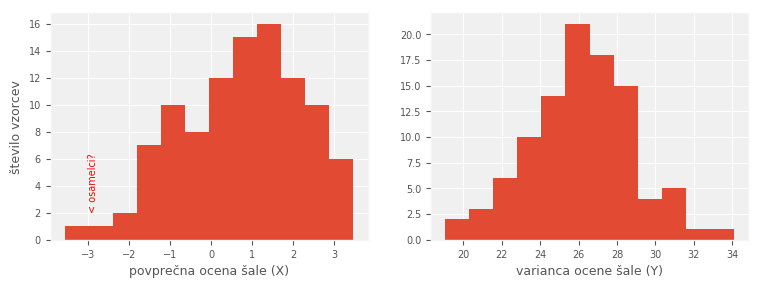

In [7]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.hist(means, normed=False, bins=12)
plt.xlabel("povprečna ocena šale (X)")
plt.ylabel("število vzorcev")
plt.text(-3, 2, "< osamelci?", rotation=90, verticalalignment="bottom", color="red")

plt.subplot(1, 2, 2)
plt.hist(variances, normed=False, bins=12)
plt.xlabel("varianca ocene šale (Y)");

Tole izgleda že bolje. Večina šal je torej v povprečju ocenjenih pozitivno, zelo malo je negativnih. Porazdelitvi spominjata na znane porazdelitve, kjer je večina primerov (šal) porazdeljenih okoli srednje vrednosti, manj pa je ekstremnih vrednosti.

Poglejmo za trenutek porazdelitev povprečnih ocen. Izgleda, da imamo nekaj **osamelcev** - zelo slabih šal, ocenjenih z manj kot $X = -2$. Kako pomenljiv je padec od $X = -2$ navzdol? Da bi odgovorili na to vprašanje, spoznajmo osnove modeliranja podatkov s pomočjo verjetnostnih porazdelitev.

Povprečna ocena izgleda normalno porazdeljena. Kakšni so najbolj verjetni parametri porazdelitve?

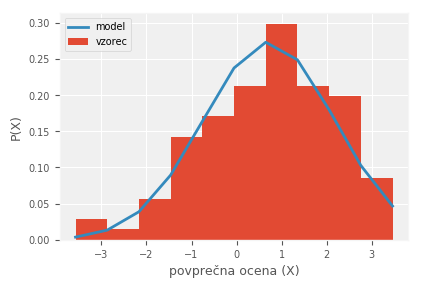

In [8]:
from scipy.stats import multivariate_normal as mvn

data = means
    
# Ocenimo parametre normalne (Gaussove) porazdelitve
n = len(data)
mu = np.mean(data)              # ocena sredine
sigma2 = (n-1)/n * np.var(data) # ocena variance

plt.figure()
counts, bins, _ = plt.hist(data, normed=True, label="vzorec", bins=10)    # dobimo razpon
pdf = [mvn.pdf(x, mu, sigma2) for x in bins]                              # pdf: [p]robability [d]ensity [f]unction
plt.plot(bins, pdf, "-", label="model", linewidth=2.0)
plt.xlabel("povprečna ocena (X)")
plt.ylabel("P(X)")

plt.legend(loc=2);

Na oko lahko ocenimo, da se porazdelitev kar dobro ujema z vzorcem. Kako statistično značilne so šale, ki imajo vrednost meritve manjšo od $X=-2.0$? *Kako nenavadno slabe so v resnici te šale?* Za odgovor na to vprašanje bomo izračunali t.i. *p-vrednost*. S pomočjo p-vrednosti ocenimo *nenavadnost* meritve, v našem primeru povprečne ocene šale.

**Definicija.** P-vrednost je verjetnost, da pri vzorčenju ene vrednosti naključne spremenljivke dobimo dano ali manjšo (oz. večjo) vrednost. 

Definicijo si najlažje ogledamo grafično. Oglejmo si funkcijo porazdelitve, dobljeno z ocenjenima parametroma $\mu$ in $\sigma^2$.

Verjetnost šale z oceno -2.000 ali manj: 3.019 %
Nenavadnost šale JE statistično značilna (prag = 5.000 %)


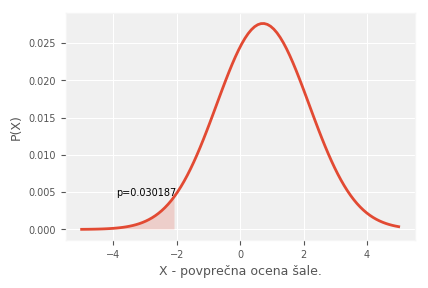

In [9]:
# Meritev, ki bi jo radi statisticno ocenili  
qx = -2


# Izračunamo P(x) za dovolj velik interval
xr    = np.linspace(-5, 5, 100)
width = xr[1] - xr[0]       # sirina intervala
Px = [mvn.pdf(x, mu, sigma2) * (xr[1]-xr[0])   for x in xr]


# Vse vrednosti, ki so manjše ali enake od qx
ltx     = xr[xr <= qx]      

# Množimo s širino intervala, da dobimo ploščino pod krivuljo
P_ltx = [mvn.pdf(x, mu, sigma2) * width for x in ltx] 
                            
# p-vrednost: ploscina pod krivuljo P(x) za vse vrednosti, manjse od qx
p_value = np.sum(P_ltx)

# Graf funkcije
plt.figure()
plt.plot(xr, Px, linewidth=2.0)
plt.fill_between(ltx, 0, P_ltx, alpha=0.2)
plt.text(qx, mvn.pdf(qx, mu, sigma2) * width, 
         "p=%f" % p_value,  
         horizontalalignment="right",
         verticalalignment="center",
        )

plt.xlabel("X - povprečna ocena šale.")
plt.ylabel("P(X)")
plt.legend()


# Poglejmo, ali je meritev statistično značilna pri danem pragu alpha (0.05, 0.01, 0.001 ... )
alpha = 0.05
if p_value < alpha:
        sig = "JE"
else:
        sig = "NI"

# Rezultat statističnega testa
print("Verjetnost šale z oceno %.3f ali manj: " % qx + "%.3f" % (100 * p_value) +  " %")
print("Nenavadnost šale %s statistično značilna (prag = %.3f" % (sig, 100*alpha), "%)")

Sedaj lahko za vsako ekstremno vrednost v podatkih (bodisi visoko ali nizko) <i>statistično</i> ocenimo vrednost njene nenavadnosti. Pri postavljenem pragu npr. $\alpha = 0.05$ lahko sprejmemo odličitev, ali je neka meritev osamelec ali ne.

##### Vprašanje 3-2-2

Izpiši vse šale osamelce, katerih povprečna ocena $X$ je statistično značilna, pri pragu $\alpha=0.05$. Poišči tudi osamelce med *dobro ocenjenimi* šalami.

[Odgovor](http://localhost:8888/notebooks/rešitve_03-2_osamelci.ipynb#odgovor-3-2-2)

##### Vprašanje 3-2-3

Poizkusi porazdelitev modelirati z drugimi porazdelitvami (Student, Beta). Je katera od teh porazdelitev bolj primerna?

[Odgovor](http://localhost:8888/notebooks/rešitve_03-2_osamelci.ipynb#odgovor-3-2-3)

##### Vprašanje 3-2-4

Ponovi analizo za spremenljivko $Y$ - varianca ocen šale. Odgovori na vprašanja:
* Katera od porazdelitev (normalna, Student, Beta) se najbolje prilega vzorcu?
* Katere so statistično značilne šale (z visoko ali nizko varianco)?
* Kaj pomeni, če ima šala visoko ali nizko vrednost $Y$?

[Odgovor](http://localhost:8888/notebooks/rešitve_03-2_osamelci.ipynb#odgovor-3-2-4)